## Statistics Tools

<span style=" color:red">NOTE</span>: In this notebook I use the module `scipy.stats` for <em>all</em> statistics 
functions, including generation of random numbers. There are other modules with some overlapping functionality, e.g., the regular python `random` module, and the `scipy.random` module, but I do not use them here.  The `scipy.stats` module includes tools for a large number of distributions, it includes a large and growing set of statistical functions, and there is a unified class structure.  (And namespace issues are minimized.)  See https://docs.scipy.org/doc/scipy/reference/stats.html.

In [1]:
import scipy as sp
from scipy import stats

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

### Generating random integers

In [2]:
# Generate n integers between low and high:
low, high, n = (-3, 6, 100)
sp.stats.randint.rvs(low, high+1, size=n)

array([ 5,  5,  5, -3,  6,  3,  2,  5,  6,  1, -1, -1,  0,  4, -3, -3,  0,
        6, -1,  2,  4,  3,  4,  0,  1, -1, -1,  3,  6,  2,  6,  3,  4, -3,
        3,  3,  2,  3, -3,  4, -1,  3,  3, -1,  6,  3, -2, -1,  1,  5,  2,
        2,  4,  5, -3,  1, -1,  1,  0, -1, -2,  3, -3,  5,  6, -2,  2,  1,
        3,  4, -2,  5,  5,  3,  2,  3,  3, -2, -1, -3,  3,  4,  4,  2,  0,
        4,  2,  1,  2,  5,  5, -1,  3,  3,  6, -2,  4,  1, -2,  2])

### Sampling random numbers from a uniform p.d.f.

In [3]:
# Sample n random numbers in interval [0.0,1.0):
n = 10
sp.stats.uniform.rvs(size=10)

array([ 0.97139663,  0.5106549 ,  0.71430137,  0.49290976,  0.16262571,
        0.24590781,  0.64637805,  0.2963388 ,  0.34874943,  0.55503961])

### Sampling random numbers from a normal distribution

Sample $n$  random numbers from the normal distribution with mean $\mu$, standard deviation $\sigma$, and pdf of Eq.(2.4) of Hughes & Hase:
\begin{equation}
p(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{(x-\mu)^2}{\sigma^2}\right]
\end{equation}

In [4]:
# Sampling from normal distribution
n = 10
mean = 10.
sigma = 2.
sp.stats.norm.rvs(mean, sigma, size=n)

array([ 12.42772776,  13.15772204,   9.10102041,   6.95529362,
        11.56118058,   9.40949603,  13.06674735,  11.23082263,
        14.88314085,  10.18497278])

Graph the pdf of the normal distribution.

<IPython.core.display.Javascript object>


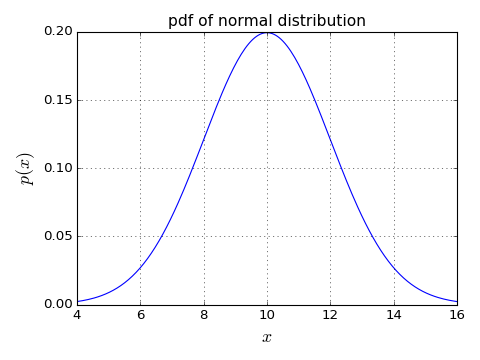

In [5]:
x = sp.linspace(mean-3.*sigma, mean+3.*sigma,200) 
y = sp.stats.norm.pdf(x, mean, sigma)
plt.figure(1)
plt.title("pdf of normal distribution")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.grid()
plt.plot(x, y);

Graph cdf of normal distribution

<IPython.core.display.Javascript object>


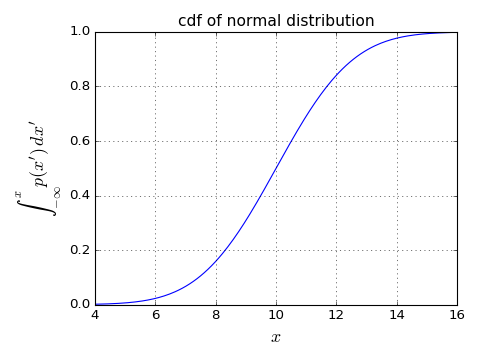

In [6]:
x = sp.linspace(mean-3.*sigma, mean+3.*sigma, 200)
y = sp.stats.norm.cdf(x, mean, sigma)
plt.figure(2)
plt.title("cdf of normal distribution")
plt.xlabel("$x$")
plt.ylabel("$\int_{-\infty}^x p(x^\prime)\, dx^\prime$")
plt.grid()
plt.plot(x, y);

## Sampling random numbers from a Poisson distribution

Sample $n$  random numbers from the Poisson distribution with average count $\overline{N}$, and probability distibution given by  Eq.(3.1) of Hughes & Hase:
\begin{equation}
p(N;\overline{N}) = \frac{\exp\left(-\overline{N}\right)\overline{N}^N}{N!}
\end{equation}
The standard deviation of the Poisson distribution is given by 
$$ \sigma = \sqrt{\overline{N}}.  $$

In [7]:
# Sampling from a Poisson distribution 
n = 100
mean = 5
sp.stats.poisson.rvs(mean, size=n)

array([3, 7, 9, 5, 4, 3, 1, 4, 2, 7, 8, 7, 2, 4, 4, 2, 2, 5, 1, 6, 8, 8, 7,
       3, 5, 6, 4, 5, 6, 5, 6, 2, 6, 4, 8, 5, 6, 3, 3, 7, 5, 5, 5, 6, 2, 6,
       3, 6, 5, 4, 5, 7, 2, 3, 3, 9, 3, 9, 7, 7, 1, 7, 6, 3, 7, 0, 4, 4, 4,
       1, 9, 3, 5, 1, 5, 6, 4, 2, 4, 5, 7, 7, 8, 5, 4, 5, 7, 6, 5, 2, 4, 8,
       5, 0, 4, 3, 2, 5, 6, 6])

In [8]:
sp.mean(_)    # The underscore "_" is similar to Mathematicas "%"
              # It refers to the output of the previously executed cell

4.75

In [9]:
sp.std(__)    # Notice the double underscore "__"

2.1465087933665679

In [10]:
sp.sqrt(mean)

2.2360679774997898

#### Graph of pmf ($\sim$pdf) of Poisson distribution

<IPython.core.display.Javascript object>


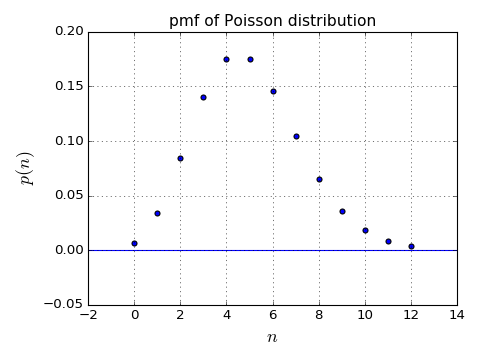

In [11]:
x = sp.linspace(0, 12, 13)
y = sp.stats.poisson.pmf(x, mean)
plt.figure(3)
plt.title("pmf of Poisson distribution")
plt.xlabel("$n$")
plt.ylabel("$p(n)$")
plt.grid()
plt.axhline(0)
plt.scatter(x, y);


#### Graph cdf of Poisson distribution

<IPython.core.display.Javascript object>


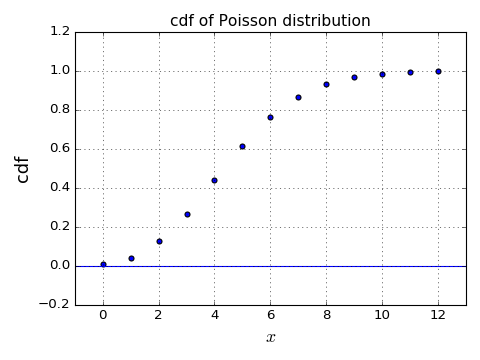

In [12]:
x = sp.linspace(0, 12, 13)
y = sp.stats.poisson.cdf(x, mean)
plt.figure(4)
plt.title("cdf of Poisson distribution")
plt.xlabel("$x$")
plt.ylabel("cdf")
plt.xlim(-1, 13)
plt.grid()
plt.axhline(0)
plt.scatter(x, y);

## Sampling random numbers from a binomial distribution

Consider $n$ trials, with probability of success $p$ in each trial.  The array below is the number successes in each of $size$ trials.

In [13]:
# Sampling from a binomial distribution
n = 2
p = 0.4
sp.stats.binom.rvs(n, p, size=100)

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 2, 2, 1, 1])

In [14]:
sp.mean(_)


0.72999999999999998

The probablity of getting $x$ successes is given by the probability mass function (pmf).  This is analogous to the continous pdf (and it's called the PDF in Mathematica).  As an example, the probability of 2 successes in 3 trials with a probability of success in each trial of 0.4 is
29%:


In [15]:
n, s, p = (3, 2, 0.4)
sp.stats.binom.pmf(s, n, p)

0.28799999999999998

#### Graph of pmf (~pdf) of binomial distribution

<IPython.core.display.Javascript object>


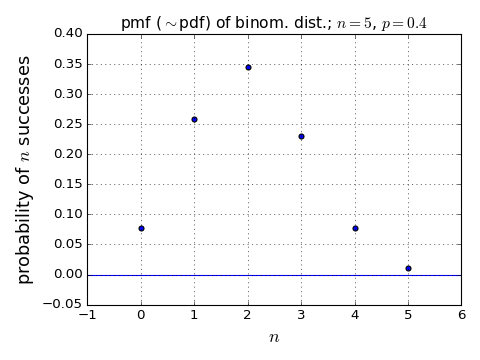

In [16]:
n = 5
x = sp.linspace(0, n, n+1)
y = sp.stats.binom.pmf(x, n, p)
plt.figure(5)
plt.title("pmf ($\sim$pdf) of binom. dist.; $n=5$, $p = 0.4$")
plt.xlabel("$n$")
plt.ylabel("probability of $n$ successes")
plt.grid()
plt.axhline(0)
plt.scatter(x, y);

#### Graph of cdf of binomial distribution

<IPython.core.display.Javascript object>


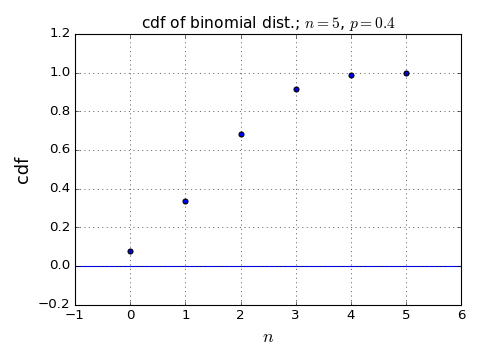

In [17]:
n = 5
x = sp.linspace(0, n, n+1)
y = sp.stats.binom.cdf(x, n, p)
plt.figure(6)
plt.title("cdf of binomial dist.; $n=5$, $p = 0.4$")
plt.xlabel("$n$")
plt.ylabel("cdf")
plt.grid()
plt.axhline(0)
plt.scatter(x, y);

## Histograms

In [18]:
# Generate some random data from a normal distribution.

n = 100
mean = 10.
sigma = 2.
data = sp.stats.norm.rvs(mean, sigma, size=n)

<IPython.core.display.Javascript object>


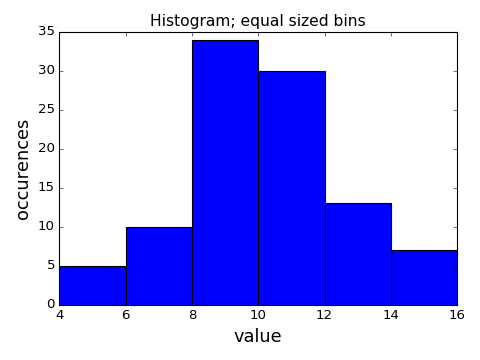

(array([  5.,  10.,  34.,  30.,  13.,   7.]),
 array([  4.,   6.,   8.,  10.,  12.,  14.,  16.]))

In [19]:
# Select number of bins between low and high values.
# plt.hist outputs the binned data and plots the histogram.

nbins = 6
low = mean - 3*sigma
high = mean + 3*sigma
plt.figure(7)
plt.xlabel("value")
plt.ylabel("occurences")
plt.title("Histogram; equal sized bins")
out = plt.hist(data, nbins, [low,high])
out[0],out[1]    # occurrences and bin boundaries

<IPython.core.display.Javascript object>


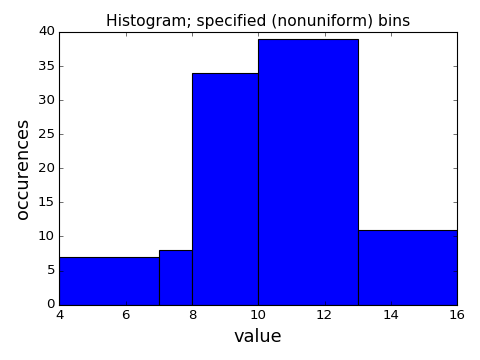

(array([  7.,   8.,  34.,  39.,  11.]), array([ 4,  7,  8, 10, 13, 16]))

In [20]:
# Select specific bin boundaries
# plt.hist outputs the binned data and plots the histogram.

bins = [4, 7, 8, 10, 13, 16]
plt.figure(8)
plt.xlabel("value")
plt.ylabel("occurences")
plt.title("Histogram; specified (nonuniform) bins")
out = plt.hist(data, bins)
out[0],out[1]   # occurrences and bin boundaries

### Version Information 
`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [21]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [22]:
version_information scipy, matplotlib

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
matplotlib 2.0.2
Tue Aug 01 10:40:17 2017 EDT